# Assignment #1 - Linear Regression

<font color="red"> <b> Due: Sep 24 (Tuesday) 11:00 pm </b> </font>

<font color="blue"> Providence Adu</font>

# Introduction

#### Describe the objective of this assignment. You can briefly state how you accompilsh it.
****************************************************************************************************************************
The objective of this assignment is to use linear regression to predict the price of a house based on a set of parameters. These parameters include number of bed rooms, year a building was built, and heated area. At the end of this assignment, I aim to accomplish the implementation least squares and least mean squares

# Data

#### Introduce your data and visualize them. Describe your observations about the data.
You can reuse the regression data that you examined in Assignment #0. 


*****************************************************************************************************************************


This data is tax parcel data from the Mecklengburg County. The city government maintains a database of all the parcels in the City of Charlotte. They do this for multiple reasons which includes the following :
 * Keep track of development in the city
 * Using is a basis to collect property tax
 * Zoning and Landuse planning 

Getting this data involved multiple steps. The city government had this data in a GIS Shapefile format. Shapefile is a geospatial vector data format that allows the city government to view parcel shape and information digitally. The shapefile uses a grid format to store attribute information (features). Hence in ArcGIS Pro (which is a geospatial software), the attribute data was converted to CSV file using a geoprocessing tool called Table to Table. 

After the table was extracted, the data was ready for use.The tax parcel data has attritubes or features that describe : sales prices of houses on each parcels, number of bed rooms, owner of parcels, building grade, among other attributes. This is a huge database with about 410405 rows and 78 columns. 

The nature of the data allows use for linear regression. The sales price on houses can be infered or predicted using attributes or features like number of bed rooms, the age of the house, heated area, and even the height of the building considering some houses are storey buildings. 

In linear regression, multiple research create hedonic price modeling. Hedonic price modeling standize housing typologies and consequently assess whether there exist differences in housing prices based on local variations. However, hedonic price modeling has its limitation as it relies on linear relationship between dependent and independent variables. However, some variables do have non-linear relationships, hence, they have to be adjusted for. One way to handle these non-linear relationships is for example taking the log of features. Where as some of these approaches are working, machine learning offers multiple methods in dealing with non-linear relationship, as well as creating options to predict instead of making inferences. 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.1f}'.format
from pandas.plotting import scatter_matrix
%matplotlib inline
from numpy.linalg import inv

In [91]:
df = pd.read_csv("providence.csv")
df

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0,1,11,29,53,54,62,66) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,OBJECTID,map_book,map_page,map_block,lot_num,nc_pin,condo_town_flag,parcel_type,pid,legal_from,...,neighcode,neighbourhood,ownertype,ownerno,accounttype,parlegaldesc,parlandunittype,landsequenceno,SHAPE,FULL_ADDRESS
0,6157333,193,33.0,4,72.0,4590571562.0,0.0,0.0,19333472,19:00.0,...,nan,MILLSTONE RIDGE,,1.0,INDIVIDUAL,L84 M37-681,AC,1.0,0xD8080000010409000000801938E0BDD0364100991324...,12905 PHILLIPS RD
1,6157334,193,33.0,4,82.0,4590379893.0,0.0,0.0,19333482,19:00.0,...,nan,MILLSTONE RIDGE,,1.0,NC CORP,L5 M44-706,AC,1.0,0xD8080000010411000000801938A058CC364100E1F49E...,1108 ACACIA ST
2,6157335,193,33.0,6,6.0,4590266894.0,0.0,0.0,19333606,19:00.0,...,nan,CREEKWOOD / PLEASANT KNOLL,,1.0,INDIVIDUAL,L22 B8 M17-209,NaN,1.0,0xD8080000010405000000406BF07E15C7364100142862...,1023 LIGHTWOOD DR
3,6157336,193,33.0,6,36.0,4590264834.0,0.0,0.0,19333636,19:00.0,...,nan,CREEKWOOD / PLEASANT KNOLL,,1.0,INDIVIDUAL,L25 B8 M19-15,NaN,1.0,0xD808000001040C0000004038BDCB2DC636410070B794...,931 LIGHTWOOD DR
4,6157337,193,33.0,6,37.0,4590265719.0,0.0,0.0,19333637,19:00.0,...,nan,CREEKWOOD / PLEASANT KNOLL,,1.0,INDIVIDUAL,L24 B8 M19-15,NaN,1.0,0xD808000001040A0000004038BD4B66C63641000A512E...,1007 LIGHTWOOD DR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410400,6567728,205,16.0,7,54.0,4530888501.0,0.0,0.0,20516754,39:05.0,...,nan,NaN,NaN,nan,NaN,NaN,NaN,nan,0xD8080000010405000000400F61A434F435410028D6F9...,NaN
410401,6567729,221,6.0,5,51.0,4439408794.0,0.0,0.0,22106551,49:01.0,...,nan,NaN,NaN,nan,NaN,NaN,NaN,nan,0xD8080000010405000000C0FAB264E2E43541007A8EB8...,NaN
410402,6567730,53,20.0,2,18.0,4505883499.0,0.0,0.0,5320218,18:57.0,...,nan,NaN,NaN,nan,NaN,NaN,NaN,nan,0xD8080000010405000000C05642E74B7D3541005CCC47...,NaN
410403,6567731,111,13.0,5,57.0,4594708795.0,0.0,0.0,11113557,04:17.0,...,nan,NaN,NaN,nan,NaN,NaN,NaN,nan,0xD8080000010406000000406BF0EEF8DA36410014EBAC...,NaN


In [92]:
df.columns

Index(['OBJECTID', 'map_book', 'map_page', 'map_block', 'lot_num', 'nc_pin',
       'condo_town_flag', 'parcel_type', 'pid', 'legal_from', 'commonpid',
       'taxpid', 'totalac', 'ownerlastname', 'ownerfirstname',
       'cownerfirstname', 'cownerlastname', 'houseno', 'houseunit', 'stdir',
       'stname', 'sttype', 'stsuffix', 'codemunicipality', 'municipality',
       'mailaddr1', 'mailaddr2', 'city', 'state', 'zipcode',
       'extravaluefeature', 'landvalue', 'totalvalue', 'dateofsale', 'price',
       'cardno', 'yearbuilt', 'heatedarea', 'cdebuilding', 'descbuildingtype',
       'storyheight', 'aheatingtype', 'heatedfuel', 'actype', 'extwall',
       'foundation', 'numfireplaces', 'fireplaces', 'bldggrade', 'fullbaths',
       'halfbaths', 'bedrooms', 'units', 'deedbook', 'deedpage', 'grantor',
       'vacantorimproved', 'typeofdeed', 'legalreference', 'taxfire', 'taxmun',
       'taxspecdist', 'dateannexed', 'landusecode', 'netbldgvalue',
       'physicaldepcode', 'propertyuseco

This step involved subsetting the data to select the indepedent and the dependent variables. The dependent variable was price, while the independent variables were heatedarea, yearbuilt, bedrooms, numfireplaces and total ac. Consequently, the null values were dropped. The next step was looking at the relationship between the variables using a correlation matrix. 

In [93]:
Parcel = pd.DataFrame(df, columns = ["price", "heatedarea", "yearbuilt", "bedrooms","numfireplaces", "totalac" ])


In [94]:
Parcels = Parcel.dropna()
Parcels

,price,heatedarea,yearbuilt,bedrooms,numfireplaces,totalac
0,278500.0,2868.0,2005.0,4.0,1.0,0.4
2,142000.0,1666.0,1974.0,3.0,1.0,0.0
3,77500.0,2224.0,1979.0,4.0,1.0,0.0
4,85000.0,1938.0,1979.0,4.0,1.0,0.0
5,140000.0,1938.0,1979.0,4.0,1.0,0.0
...,...,...,...,...,...,...
410156,63000.0,1603.0,1982.0,3.0,1.0,0.0
410157,0.0,1781.0,1973.0,3.0,1.0,0.0
410158,225000.0,3556.0,2004.0,3.0,1.0,0.3
410159,0.0,1356.0,1974.0,3.0,1.0,0.0


In [95]:
Parcels.dtypes

price            float64
heatedarea       float64
yearbuilt        float64
bedrooms         float64
numfireplaces    float64
totalac          float64
dtype: object

In [96]:
Parcels = Parcels.loc[:,("price","heatedarea", "yearbuilt", "bedrooms","numfireplaces","totalac", 
                      ) ].apply(np.int64)

In [97]:
Parcels = Parcels.assign(Year = 2020 - Parcels["yearbuilt"])
Parcels = Parcels.drop(columns = ["yearbuilt"] )
Parcels

,price,heatedarea,bedrooms,numfireplaces,totalac,Year
0,278500,2868,4,1,0,15
2,142000,1666,3,1,0,46
3,77500,2224,4,1,0,41
4,85000,1938,4,1,0,41
5,140000,1938,4,1,0,41
...,...,...,...,...,...,...
410156,63000,1603,3,1,0,38
410157,0,1781,3,1,0,47
410158,225000,3556,3,1,0,16
410159,0,1356,3,1,0,46


In [98]:
Parcels = Parcels[Parcels.numfireplaces < 10 ]
Parcels = Parcels[Parcels.bedrooms < 10 ]
Parcels = Parcels[Parcels.totalac < 10 ]
Parcels = Parcels[Parcels.price < 10000000.0]
Parcels 

,price,heatedarea,bedrooms,numfireplaces,totalac,Year
0,278500,2868,4,1,0,15
2,142000,1666,3,1,0,46
3,77500,2224,4,1,0,41
4,85000,1938,4,1,0,41
5,140000,1938,4,1,0,41
...,...,...,...,...,...,...
410156,63000,1603,3,1,0,38
410157,0,1781,3,1,0,47
410158,225000,3556,3,1,0,16
410159,0,1356,3,1,0,46


In [99]:
Parcels.describe()

,price,heatedarea,bedrooms,numfireplaces,totalac,Year
count,274079.0,274079.0,274079.0,274079.0,274079.0,274079.0
mean,216798.6,2494.9,3.2,0.8,0.1,33.3
std,318167.0,6696.9,1.0,0.5,0.6,21.7
min,0.0,0.0,0.0,0.0,0.0,2.0
25%,72000.0,1396.0,3.0,1.0,0.0,17.0
50%,157000.0,1902.0,3.0,1.0,0.0,27.0
75%,270000.0,2681.0,4.0,1.0,0.0,48.0
max,9630000.0,1141606.0,9.0,9.0,9.0,230.0


In [100]:
Parcels.corr()

,price,heatedarea,bedrooms,numfireplaces,totalac,Year
price,1.0,0.3,0.1,0.1,0.2,-0.1
heatedarea,0.3,1.0,-0.1,-0.0,0.3,-0.0
bedrooms,0.1,-0.1,1.0,0.4,-0.2,-0.3
numfireplaces,0.1,-0.0,0.4,1.0,-0.1,-0.2
totalac,0.2,0.3,-0.2,-0.1,1.0,0.1
Year,-0.1,-0.0,-0.3,-0.2,0.1,1.0


#### Variables

x = Independent variables

y =  Dependent variables 

In [101]:
X = pd.DataFrame(Parcels, columns = ["heatedarea", "Year", "bedrooms","numfireplaces", "totalac" ])
y = Parcels["price"]
print(X)
print(y)

        heatedarea  Year  bedrooms  numfireplaces  totalac
0             2868    15         4              1        0
2             1666    46         3              1        0
3             2224    41         4              1        0
4             1938    41         4              1        0
5             1938    41         4              1        0
...            ...   ...       ...            ...      ...
410156        1603    38         3              1        0
410157        1781    47         3              1        0
410158        3556    16         3              1        0
410159        1356    46         3              1        0
410160        1458    46         3              1        0

[274079 rows x 5 columns]
0         278500
2         142000
3          77500
4          85000
5         140000
           ...  
410156     63000
410157         0
410158    225000
410159         0
410160    211000
Name: price, Length: 274079, dtype: int64


In [102]:
X = X.values
y = y.values

In [103]:

X.shape, y.shape

((274079, 5), (274079,))

$$
w = (X^T \cdot X)^{-1} \cdot X^T \cdot T
$$

# Method

Summarize the linear models (least-squares and LMS) and explain your implementation of **class** *LinearModel*. 
The explanation of your codes should not be the comments in a code cell. 
This section should include
 - review of the linear models 
 - your implementation and description
 
 
 
 
 
 
Review of Linear Models 
***************************************************************************************************************************
Linear model describes the Euclidean dot product between two vectors. Linear models use weight vectors on an input vector to predict an output. Because the vectors used in this approach are one dimensional, thus representing a straight line, it is known as linear models. Hence, when you are running linear models, the relationship between your input x and your output y should be linear. When the relationsip between your input and output are non-linear, it voilates the assumption of linearity, hence predicitons made would be wrong or misleading. In instances where there exist non-linearity in your vectors or your input/output variables, you can for example take a logarithm of your input variables, to normalize and remove the non-linearity.


Implementation of your implementation and description
******************************************************************************************************************************
The first step was the least square implementation. This creat weights, a bias was introduced on the original dataset. This was done using the sub class self. self.add_ones(x). One the bias was added, the weight vector was initialized using the numpy function np.linalg.solve(). This function computed the dot product between the tranpose of vector x and vector x. It then calculated the inverse of the dot product. The inverse was then multiplied with the transpose of x and the target(y) variable. This then became the weight used for prediction. The weight was applied to the target to make predictions.

### Super Classs Definition

In [104]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    # check if the matrix is 2-dimensional. if not, raise an exception    
    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

### Least Squares

In [105]:
N = X.shape[0]
N

274079

In [106]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        X = self.add_ones(X)
        self.w = np.linalg.solve(X.T @ X,X.T @ T)
        pass
    
    # apply the learned model to data X
    def use(self, X):
        X = self.add_ones(X)
        P = np.dot(X,self.w)
        return  P

### Least Mean Squares

$w^{(k+1)} = w^{(k)} - \alpha(w^{(k)^T} \cdot x_k - t_k) \times x_k$

In [144]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
    
    # batch training by using train_step function
    def train(self, X, T):
        w = np.random.rand(X.shape[1])
        for k in range (N):
            y = w @ X[k,:]
            w = self.alpha * (y - T[k]) * X[k,:]
        pass  ## TODO: replace this with your codes
            
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        w = self.alpha * (y - T[k]) * X[k,:]
        pass  ## TODO: replace this with your codes
    
    # apply the current model to data X
    def use(self, X):
        p = X @ w
        return P
        pass  ## TODO: replace this with your codes
        

### Usage Examples

In [78]:
# HERE follow are for my code tests.

import matplotlib.pyplot as plt
%matplotlib inline

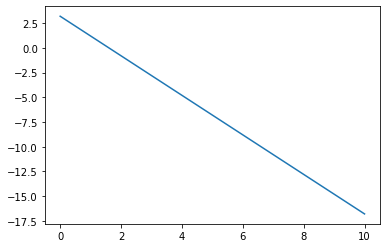

In [140]:
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2

ls = LinearRegress()

ls.train(X, T)

plt.plot(ls.use(X))

In [ ]:
lms = LMS(0.1)
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(lms.use(X))

In [ ]:
lms.train(X, T)
plt.plot(lms.use(X))

# Experiments

Apply LS and LMS methods on the data and discuss the results.
Please describe your experiment and related codes. You may have subsections of results and discussions here.


The LinearRegress class is called, and the training and use methods are applied respectively to predict the price. The graph shows that there are some outliers for the price especially for prices around 250,000 and 100,000.  

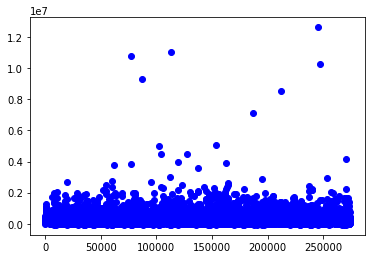

In [114]:
W = LinearRegress()
W.train(X,y)
Prediction  =  W.use(X)

plt.plot(Prediction, 'ob')


In [1]:
def data_scatter(k =274079 ):
    plt.plot(y[:k], '.')
    plt.xticks(range(0, 274079, 100)[:k], range(0, 11, 20)[:k])
data_scatter()

NameError: name 'plt' is not defined

# Conclusions

Discuss the challenges or somethat that you learned. 
If you have any suggestion about the assignment, you can write about it. 

One major challenge I found was understanding which specific variable my is predicted considering I had 5 independent variables. A good approach would be finding a way to visualize the prediciton accuracy for each category, as well as it's precision. Also there wasn't an approach to test wether there was underfitting since it is common with linear models. 

## References

Yoo, Sanglim, Jungho Im, and John E. Wagner. "Variable selection for hedonic model using machine learning approaches: A case study in Onondaga County, NY." Landscape and Urban Planning 107.3 (2012): 293-306.

Limsombunchai, Visit. "House price prediction: hedonic price model vs. artificial neural network." New Zealand agricultural and resource economics society conference. 2004.


Mason, Carl, and John M. Quigley. "Non‐parametric hedonic housing prices." Housing studies 11.3 (1996): 373-385.

Schmidtler, Mauritius AR, and Roland Borrey. "Data classification methods using machine learning techniques." U.S. Patent No. 7,937,345. 3 May 2011.

Durgesh K. Srivastava And Lekha Bhambhu "Data Classification Using Support Vector Machine" (2010) Journal of Theoretical and Applied Information Technology

Kwong, Raymond H., and Edward W. Johnston. "A variable step size LMS algorithm." IEEE Transactions on signal processing 40.7 (1992): 1633-1642.

# Extra Credit

If you want to work more for an extra credit, place your work here for additional analysis: weight and residual analysis. 
Try to answer to the following questions: 
- what is the most and least significant features for your data.
- what are the consequences if you remove those features from the model? (Show your work!)
- produce residual plots and observe the patterns for the goodness of fit    
    
**Note: the extra credit is an additional work that needs complete programming, experiments, analysis, and writing to get one. **

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes. 

** Note: this is a WRITING assignment. Proper writing is REQUIRED. Comments are not considered as writing. ** 


Points | | Description
--|--|:--
5 | Introduction  
20 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
 | 5| Preprocessing of the data 
40 | Method | 
 | 5| review
 | 5| explanation of codes
 | 30| Correct implementation (preliminary test)
30 | Experiments | 
 | 5| description, codes
 | 10| visualization of results
 | 15| analysis / comparison of algorithms
5 | Conclusions, References 

# Preliminary Test

After finishing the implmentation of LinearRegress and LMS classes, run the following cell to test if your implementation is correct. Make sure and check your codes to pass all three tests as in sample outputs. 

In [145]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )


training  LS ...
training  LMS_All ...
training  LMS_1STEP ...


NameError: name 'k' is not defined